# Introductory Seaborn

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Comparing Seaborn and matplotlib

### With matplotlib

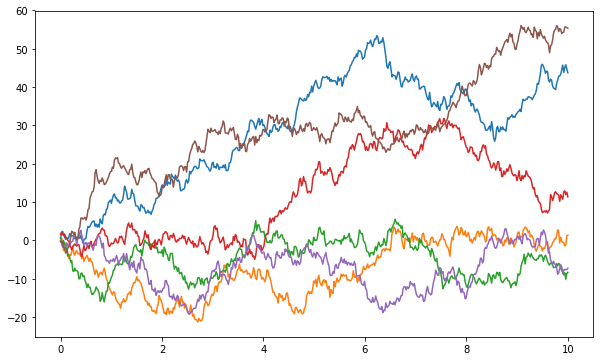

In [3]:
rng = np.random.RandomState(42)
x = np.linspace(0, 10, 500)  # a numpy array linearly spaced between 0,10, 500 values
y = np.cumsum(rng.randn(500, 6), 0)  # Get the cumulative sum of 6 random normal distributions

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(x, y)

### With seaborn

In [10]:
import seaborn as sns
sns.set()

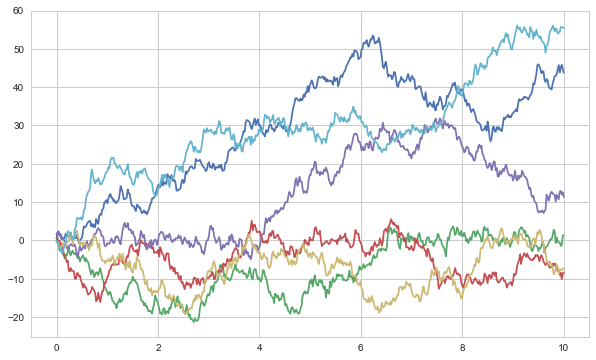

In [5]:
rng = np.random.RandomState(42)
x = np.linspace(0, 10, 500)  # a numpy array linearly spaced between 0,10, 500 values
y = np.cumsum(rng.randn(500, 6), 0)  # Get the cumulative sum of 6 random normal distributions

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(x, y);

In [3]:
tips = sns.load_dataset('tips')
tips.head()  # numerical: total_bill, tip, size. Categorical: sex, smoker, day, time

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


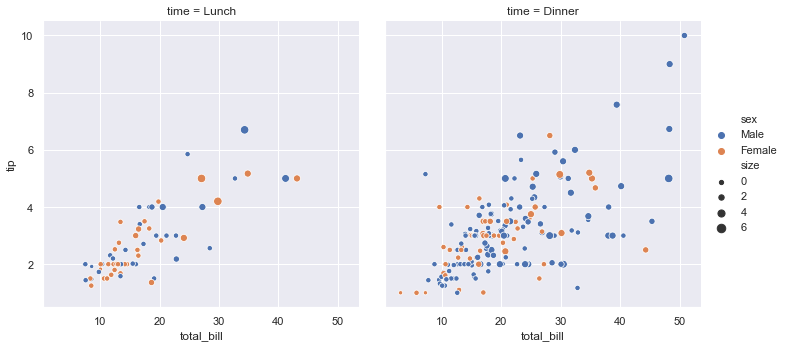

In [20]:
sns.relplot(data=tips, x='total_bill', y='tip', col='time',
           hue='sex', size='size', kind='scatter')

### Histograms, KDE, densities

In [38]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 3]], size=2000)
df = pd.DataFrame(data, columns=list('xy'))
df.head()

,x,y
0,1.013065,2.301241
1,3.809741,2.165126
2,1.081929,0.207289
3,-2.006827,-2.250008
4,-0.457410,-1.482708


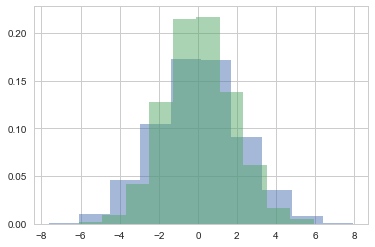

In [39]:
for col in 'xy':
    plt.hist(df[col], density=True, alpha=0.5)

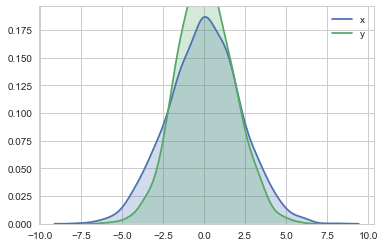

In [40]:
# kde

for col in 'xy':
    sns.kdeplot(df[col], shade=True)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


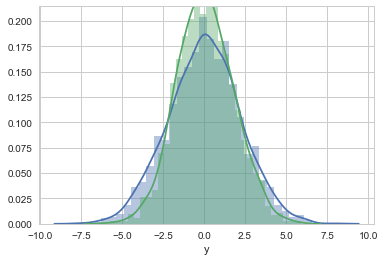

In [41]:
for col in 'xy':
    sns.distplot(df[col])

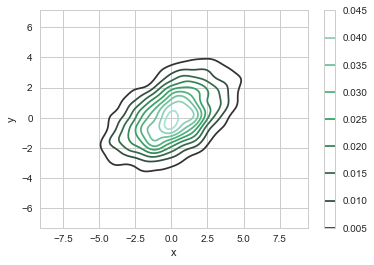

In [44]:
sns.kdeplot(df['x'], df['y'], cbar=True)

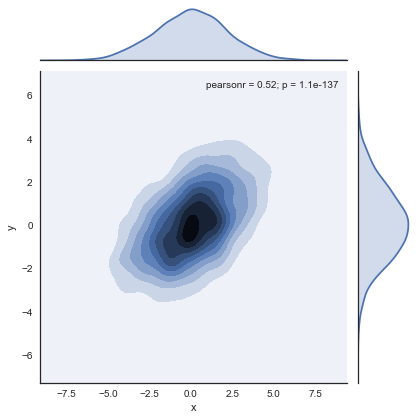

In [46]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', df, kind='kde')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


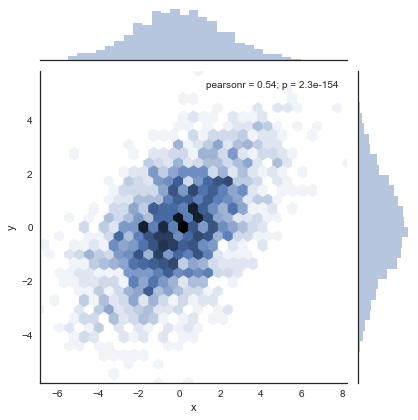

In [12]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', df, kind='hex')

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


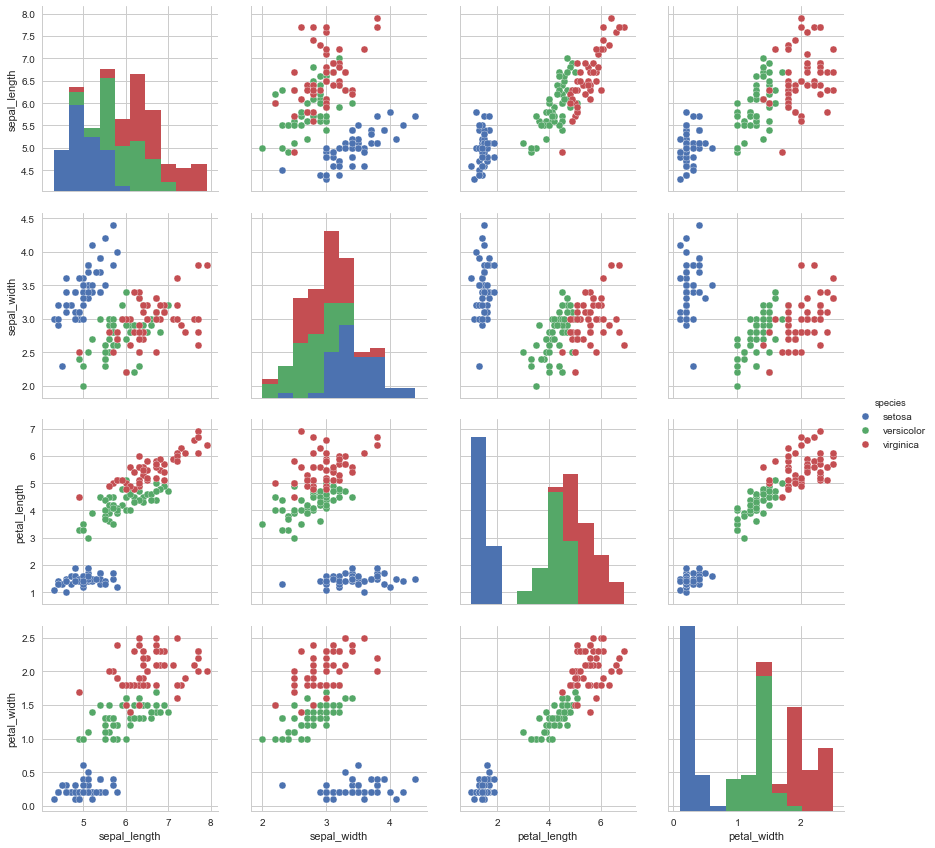

In [14]:
sns.pairplot(iris, hue='species', size=3)

In [11]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# Make tip percent column
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [12]:
worms = tips.rename(columns={'sex': 'prepost', 'time': 'min'})

In [22]:
worms.prepost = worms.prepost.map({'Male': 'Pre', 'Female': 'Post'})

In [30]:
worms['min'] = worms['min'].map({'Lunch': '1 min', 'Dinner': '5 min'})

In [32]:
worms['smoker'] = worms['smoker'].map({'No': 'Unpaired', 'Yes': 'Paired'})

In [ ]:
worms.rename(columns={'smoker': ''})

KeyError: "['tip_pct'] not in index"

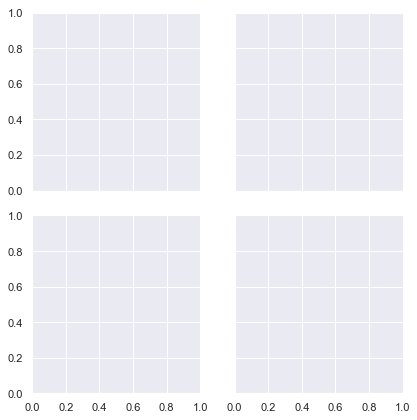

In [14]:
# Make a facet grid with rows being gender, columns being time of day

grid = sns.FacetGrid(worms, row='prepost', col='min', margin_titles=True)  # Make FacetGrid object
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15), edgecolor='white', color='k') # Map a histogram of tip_pct on to grid. Bins are 0,40,15 linspace.

### Barplots

In [16]:
df = sns.load_dataset('tips')

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


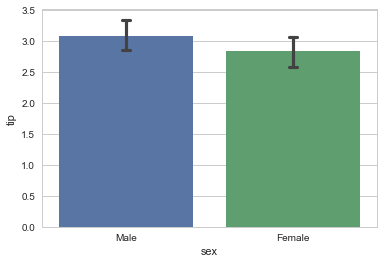

In [21]:
sns.barplot(data=df, x='sex', y='tip', capsize=0.05)

### Factor Plots

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


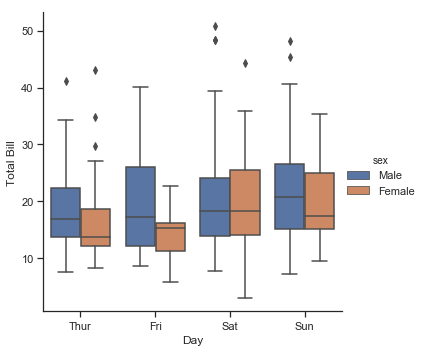

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day', 'total_bill', 'sex', data=df, kind='box')
    g.set_axis_labels('Day', 'Total Bill');

### Joint Distributions

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


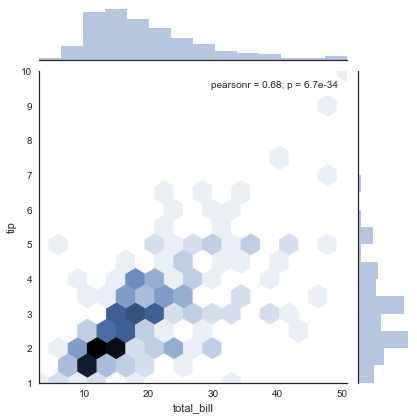

In [34]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=df, kind='hex')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


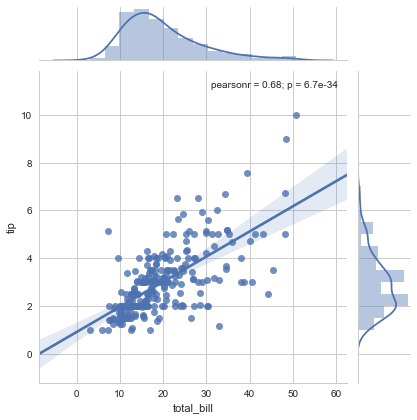

In [35]:
sns.jointplot('total_bill', 'tip', data=df, kind='reg')

### Bar Plots

In [2]:
import pandas as pd
import matplotlib.pyplot as pltl
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


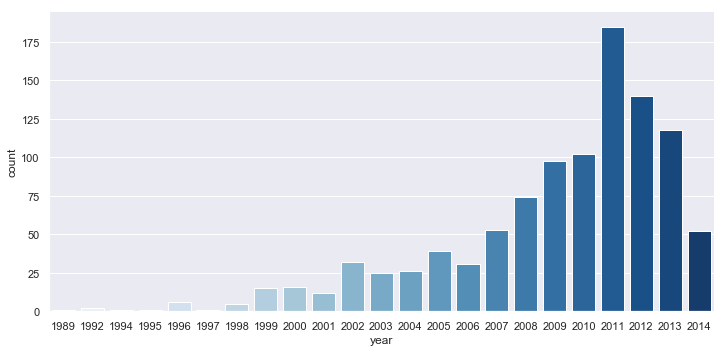

In [14]:
sns.catplot(data=planets, x='year', kind='count', aspect=2, palette='Blues');

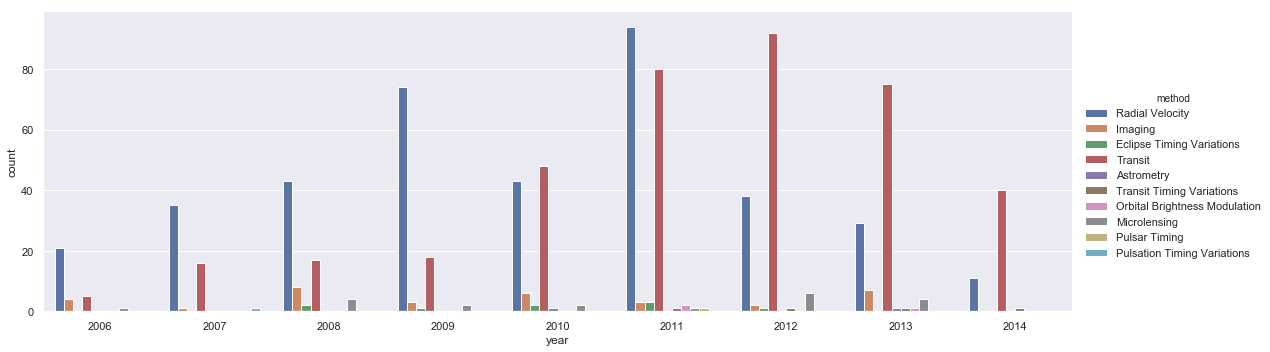

In [8]:
# Learn about method of discovery
# Make a catplot on count, with the hue being method
# Change the order

sns.catplot(data=planets, x='year', kind='count', hue='method', aspect=3, order=range(2006, 2015))